In [ ]:

# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active 
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')

In [2]:
elev = elevators['train'].to_pandas()
elev

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.022


In [4]:
from sklearn.linear_model import LinearRegression

X = elev.drop(columns=['Goal'])
y = elev['Goal']

lr_elev = LinearRegression()
lr_elev.fit(X, y)

LinearRegression()

In [ ]:
# coefficients array (B1 B2, B3, etc)
lr_elev.coef_

array([ 3.27106569e-06,  5.61529798e-06,  3.74004651e-03,  8.61939078e-04,
        2.58585645e-07,  1.64094801e-03, -6.34098825e-05,  5.36145023e-01,
       -1.13260740e-04, -5.64354233e+00, -1.61724342e+01,  1.25585077e+01,
       -6.89690670e+00,  2.49509111e+00,  4.87181641e+00, -1.33860695e+01])

In [6]:
lr_elev.intercept_

np.float64(0.01768750384807027)

<Axes: >

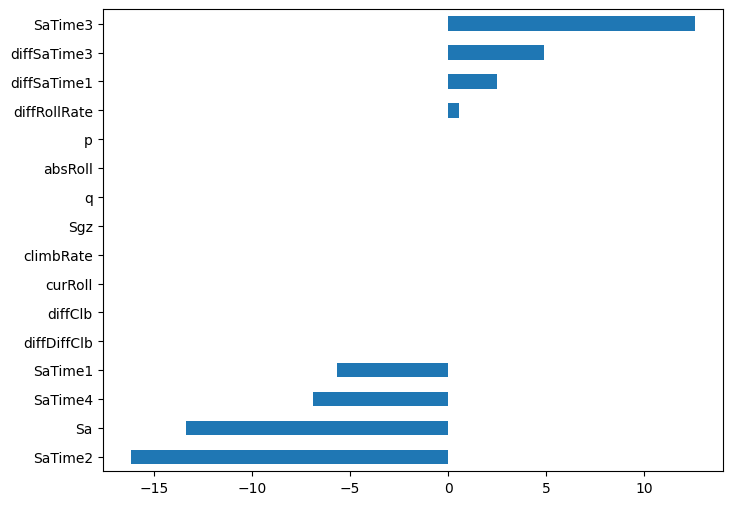

In [ ]:
import pandas as pd

# plot magnitudes of coefficients
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [9]:
# score is R^2 - the proportion of variance explained by the model
lr_elev.score(X, y)

0.8134729462382582

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# more metrics
mean_absolute_error(y, lr_elev.predict(X)), mean_squared_error(y, lr_elev.predict(X))

(0.001988293813303616, 8.415421985112189e-06)

In [ ]:
# given first row, predict goal
lr_elev.predict(X.iloc[[0]])

array([0.03014431])

In [ ]:
# real value
y.iloc[0]

np.float64(0.031)